# 1. Introduction

**Nama:** Muhammad Fariz Firdaus

**batch:** SBY002

**objective:** This project is done to analyze the data of an apparel company. The goal of this project is to solve a problem faced by the company by analyzing their previous year sales data and giving insights and recommendations to the company.

[**link Tableau**](https://public.tableau.com/views/Milestone1_17001295246030/Dashboard_Milestone1?:language=en-US&:display_count=n&:origin=viz_share_link)



# 2. Import packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# 3. Problem Identification

## 3.1. Background

XYZ is a big online apparel company that has established itself in the world of fashion. Despite their success, XYZ recently conducted a comprehensive assessment of its financial performance and identified a downturn in revenue from their summer products, with the total revenue of €26 million. In response of this observation, XYZ has set a goal for the upcoming year: to elevate their revenue from summer products by 20% (€31 million).

As a data analyst entrusted with this project, my mission is to analyze XYZ's summer products sales data this year and identify actionable insights that can help them reach their revenue goal.

## 3.2. penjabaran problem statement

**Spcific** : Increase the sales of summer apparel on the Wish platform by strategizing the summer apparel sales.

**Measurable** : By selling their summer apparel on the Wish platform according to the strategy, the company will be able to reach €31 million in revenue.

**Achievable** : Based on the strategizing summer apparel sales, reaching €31 thousand in revenue is achievable.

**Relevant** : By planning the summer apparel sales strategy on the Wish platform, the company will be able to increase their revenue.

**Time-bound** : The company should be able to gain a 50% increase in revenue from summer apparel by the end of next summer.

## 3.3. problem statement

*"Strategizing the summer apparel sales on the Wish platform to increase the sales of summer apparel by 20% (€31 thousand) by the end of next summer."*

## 3.4. Defining the problem

Defining the problem using the 5W+1H method:

1. How is the data distribution of price, retail price, units sold, rating, and product inventory?
2. What is the potential revenue from summer apparel on the Wish platform?
3. How is the profitibility from top 10 products?
4. Are products with High Discounts more likely to be sold?
5. What is the correlation between total revenue with size and rating?
6. What are the best selling colors?
7. What are the best selling sizes?
8. How does ad boost affect the revenues?

# 4. Dataset Description and Loading

## 4.1. Dataset Information

The dataset used for this project uploaded in Kaggle [here](https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish/data). The dataset contains 1573 rows and 43 columns. Assuming that the dataset represents XYZ's summer apparel sales on the Wish platform last year, the columns in the dataset that will be used for this project are:

1. **title_orig** : The original name of the product (before translation).
2. **price** : The price of the discounted product listed on Wish.
3. **retail_price** : The original retail price of the product.
4. **units_sold** : The number of units sold.
5. **rating** : The rating of the product.
6. **uses_ad_boosts** : Whether the product was promoted with ads.
7. **product_color** : The color of the product.
8. **product_variation_size_id** : The size of the product.
9. **product_variation_inventory** : The number of inventory for the product.

The rest of the columns will not be used for this project because they are not relevant to the problem statement.

## 4.2. Importing Dataset from CSV

In [72]:
df_raw = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

## 4.3. Dataset Exploration

print the dataset information

In [73]:
# Analyze the data information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

There are 1573 rows and 43 columns in the dataset.

print some sample data

In [74]:
# Examining a sample of the dataset
df_raw.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


The columns **product_variation_size_id** and **product_color** values are not standardized, and there are negative differences between **price** and **retail_price**, which is weird assuming that **price** is the discounted price of **retail_price**.

print the sum of null values in each column

In [75]:
# Check for missing values
df_raw.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

There are 2 useful columns that have missing values, which are **product_color** and **product_variation_size_id**.

print the sum of duplicate values in the dataset

In [76]:
# Check for duplicates
df_raw[df_raw.duplicated()].shape

(34, 43)

There are duplicate rows in the dataset.

### 4.3.1. **Insights**

From exploring the dataset, we can see that:

1. There are 1573 rows and 43 columns in the dataset.
2. There are 8 columns that will be used for this project.
3. There are 35 columns that will not be used for this project.
4. There are 2 useful columns that have missing values, which are **product_color** and **product_variation_size_id**.
5. There are duplicate rows in the dataset.
6. The columns **product_variation_size_id**, **product_color** values are not standardized.
7. there are negative differences between **price** and **retail_price**, which is weird assuming that **price** is the discounted price of **retail_price**.

# 5. Data Cleaning

## 5.1. Unimportant Columns Elimination

In [77]:
# define columns to keep
columns_to_keep = ['title_orig', 'price', 'retail_price', 'units_sold', 'rating', 'uses_ad_boosts', 'product_color', 'product_variation_size_id', 'product_variation_inventory']

df_filtered = df_raw[columns_to_keep]

In [78]:
df_filtered.head()

,title_orig,price,retail_price,units_sold,rating,uses_ad_boosts,product_color,product_variation_size_id,product_variation_inventory
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,3.76,0,white,M,50
1,Women's Casual Summer Sleeveless Mini Dress,8.00,22,20000,3.45,1,green,XS,50
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,3.57,0,leopardprint,XS,1
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,4.03,1,black,M,50
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,3.10,1,yellow,S,1


## 5.2. Duplicate Rows Elimination

duplicate rows will be dropped to avoid misleading insights

In [79]:
# drop duplicates
df_duplicated_removed = df_filtered.drop_duplicates()

In [80]:
# check for duplicates
df_duplicated_removed.duplicated().any()

False

Dataset is now clean from duplicate rows

## 5.3. Cleaning Missing Values

We have to check the impact of missing values to the dataset to decide whether to drop the rows with missing values or to fill the missing values with the most frequent value in the column. To do so, we will count the percentage of missing values in the column.

In [81]:
# check for missing values
missing_value = df_filtered.isnull().sum().sort_values(ascending=False)
# calculate the percentage of missing values compared to the total data
percentage = round(missing_value/len(df_filtered)*100,2)

# concatenate the missing value and percentage
missing_value = pd.concat([missing_value, percentage], axis=1, keys=['Missing_Value', 'Percentage'])

missing_value

,Missing_Value,Percentage
product_color,41,2.61
product_variation_size_id,14,0.89
title_orig,0,0.00
price,0,0.00
retail_price,0,0.00
units_sold,0,0.00
rating,0,0.00
uses_ad_boosts,0,0.00
product_variation_inventory,0,0.00


The missing values in **product_color** and **product_variation_size_id** columns are very small, so we will drop the rows with missing values.

In [82]:
# drop missing values
df_cleaned_from_missing_value = df_filtered.dropna()

In [83]:
missing_value = df_cleaned_from_missing_value.isnull().sum().sort_values(ascending=False)
percentage = round(missing_value/len(df_filtered)*100,2)

missing_value = pd.concat([missing_value, percentage], axis=1, keys=['Missing_Value', 'Percentage'])

# check for missing values after dropping
missing_value

,Missing_Value,Percentage
title_orig,0,0.0
price,0,0.0
retail_price,0,0.0
units_sold,0,0.0
rating,0,0.0
uses_ad_boosts,0,0.0
product_color,0,0.0
product_variation_size_id,0,0.0
product_variation_inventory,0,0.0


There are no more missing values in the dataset.

## 5.4. Incorrect Value Handling

The column **product_variation_size_id** contains values that are not consistent with the size chart. We will replace the values with the correct ones. Besides, the column **tag** contains multiple tags in one row. We will split the tags into multiple rows, and only keep the top 20 tags.

### 5.4.1. **product_variation_size_id** value replacement

To handle the inconsistent values in the **product_variation_size_id** column, we will replace the values with the correct ones. The correct values are based on the size chart from the Wish website [here](https://merchantfaq.wish.com/hc/en-us/articles/205212347-What-are-acceptable-sizes-for-products).

Check the unique values in the **product_variation_size_id** column

In [84]:
# check for duplicates
df_cleaned_from_missing_value['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '2XL', '4XL', 'SizeL',
       'SIZE XXS', 'XXXXL', 'size S', '35', '34', 'SIZE-XXS',
       'S(bust 88cm)', 'S (waist58-62cm)', '20pcs', 'US-S', 'Size -XXS',
       'X   L', '25', 'Size-S', 'Pack of 1', '1 pc.', 'S Diameter 30cm',
       '6XL', 'AU plug Low quality', '5PAIRS', '25-S', 'Size/S',
       'Size-5XL', 'daughter 24M', 'Baby Float Boat', '60', 'Size-L',
       'US5.5-EU35', '10pcs', 'Size-XXS', 'Women Size 37', '4-5 Years',
       'Size4XL', 'first  generation', '80 X 200 CM', 'EU39(US8)', 'L.',
       '36', '04-3XL', 'pant

make a mapping dictionary for the values to be replaced

In [85]:
# define the size mapping
size_mapping = {
    'M': 'M',
    'XS': 'XS',
    'S': 'S',
    'Size-XS': 'XS',
    'M.': 'M',
    'XXS': 'XXS',
    'L': 'L',
    'XXL': 'XXL',
    'S.': 'S',
    's': 'S',
    'choose a size': np.nan,
    'XS.': 'XS',
    '32/L': 'L',
    'Suit-S': 'S',
    'XXXXXL': 'XXXXXL',
    'EU 35': np.nan,
    '4': np.nan,
    'Size S.': 'S',
    '1m by 3m': np.nan,
    '3XL': 'XXXL',
    'Size S': 'S',
    'XL': 'XL',
    'Women Size 36': np.nan,
    'US 6.5 (EU 37)': np.nan,
    'XXXS': 'XXXS',
    'SIZE XS': 'XS',
    '26(Waist 72cm 28inch)': np.nan,
    'Size XXS': 'XXS',
    '29': np.nan,
    '100 cm': np.nan,
    'One Size': np.nan,
    'SIZE-4XL': 'XXXXL',
    '1': np.nan,
    'S/M(child)': 'M',
    '2pcs': np.nan,
    'XXXL': 'XXXL',
    'S..': 'S',
    '30 cm': np.nan,
    '5XL': 'XXXXXL',
    '33': np.nan,
    'Size M': 'M',
    '100 x 100cm(39.3 x 39.3inch)': np.nan,
    '2XL': 'XXL',
    '4XL': 'XXXXL',
    'SizeL': 'L',
    'SIZE XXS': 'XXS',
    'XXXXL': 'XXXXL',
    'size S': 'S',
    '35': np.nan,
    '34': np.nan,
    'SIZE-XXS': 'XXS',
    'S(bust 88cm)': 'S',
    'S (waist58-62cm)': 'S',
    '20pcs': np.nan,
    'US-S': 'S',
    'Size -XXS': 'XXS',
    'X   L': 'XL',
    '25': np.nan,
    'Size-S': 'S',
    'Pack of 1': np.nan,
    '1 pc.': np.nan,
    'S Diameter 30cm': 'S',
    '6XL': 'XXXXXXL',
    'AU plug Low quality': np.nan,
    '5PAIRS': np.nan,
    '25-S': np.nan,
    'Size/S': 'S',
    'Size-5XL': 'XXXXXL',
    'daughter 24M': np.nan,
    'Baby Float Boat': np.nan,
    '60': np.nan,
    'Size-L': 'L',
    'US5.5-EU35': np.nan,
    '10pcs': np.nan,
    'Size-XXS': 'XXS',
    'Women Size 37': np.nan,
    '4-5 Years': np.nan,
    'Size4XL': 'XXXXL',
    'first  generation': np.nan,
    '80 X 200 CM': np.nan,
    'EU39(US8)': np.nan,
    'L.': 'L',
    '36': np.nan,
    '04-3XL': 'XXXL',
    'pants-S': 'S',
    'Floating Chair for Kid': np.nan,
    '20PCS-10PAIRS': np.nan,
    'Size--S': 'S',
    '5': np.nan,
    '1 PC - XL': 'XL',
    '40 cm': np.nan,
    'SIZE S': 'S'
}

apply the mapping dictionary to the **product_variation_size_id** column

In [86]:
# define the function to map the size
def map_sizes(size):
    return size_mapping.get(size, size)

# apply the function on a copy of the dataset
df_handled_value = df_cleaned_from_missing_value.copy()
df_handled_value['product_variation_size_id'] = df_handled_value['product_variation_size_id'].apply(map_sizes)

Check the unique values in the **product_variation_size_id** column after replacement

In [87]:
# check the values of the size column
df_handled_value['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'XXS', 'L', 'XXL', nan, 'XXXXXL', 'XXXL', 'XL',
       'XXXS', 'XXXXL', 'XXXXXXL'], dtype=object)

Drop the rows that was replaced with NaN values

In [88]:
# drop missing values
df_handled_value.dropna(inplace=True)

In [89]:
# check for missing values
df_handled_value['product_variation_size_id'].isnull().any()

False

In [90]:
df_handled_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1572
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1467 non-null   object 
 1   price                        1467 non-null   float64
 2   retail_price                 1467 non-null   int64  
 3   units_sold                   1467 non-null   int64  
 4   rating                       1467 non-null   float64
 5   uses_ad_boosts               1467 non-null   int64  
 6   product_color                1467 non-null   object 
 7   product_variation_size_id    1467 non-null   object 
 8   product_variation_inventory  1467 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 114.6+ KB


Only a few rows were dropped, so it will not affect the dataset much.

### 5.4.2. Colors Standardization

I noticed that the colors in the **product_color** column are not standardized. For example, there are grey and gray, which are the same color. To standardize the colors, I will use the color names from the [Wikipedia color list](https://en.wikipedia.org/wiki/List_of_colors:_A%E2%80%93F).

First we need to know all colors in the dataset

In [91]:
# identify the unique values of the color column
df_handled_value['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', 'pink', 'khaki', 'red & blue', 'blue & pink',
       'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'black & white', 'orange-red', 'dustypink', 'White',
       'star', 'white & black', 'apricot', 'burgundy', 'leopard',
       'claret', 'pink & white', 'rosered', 'tan', 'navy blue',
       'wine red', 'lightred', 'Pink', 'skyblue', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimblue', 'applegreen', 'offwhite',

In [92]:
# Standardize the color values
df_handled_value['product_color'] = df_handled_value['product_color'].str.lower().str.replace(' ', '_').str.replace('&', 'and').str.replace('-', '_')

# 'grey' and 'gray' are duplicates, so we'll replace one with the other
df_handled_value['product_color'] = df_handled_value['product_color'].replace('gray', 'grey')

# 'light_green' and 'lightgreen' are duplicates, so we'll replace one with the other
df_handled_value['product_color'] = df_handled_value['product_color'].replace('light_green', 'lightgreen')

# Display the updated DataFrame
print(df_handled_value['product_color'])

0              white
1              green
2       leopardprint
3              black
4             yellow
            ...     
1568        navyblue
1569       lightblue
1570           white
1571           white
1572             red
Name: product_color, Length: 1467, dtype: object


### 5.4.3. **price** and **retail_price** data correction

we need to drop the rows with negative differences between **price** and **retail_price** because it is weird to have a discounted price that is higher than the original price. the reason why this happened is probably because the website shows the retail price in the local currency, while the discounted price is shown in Euros.

In [93]:
# calculate the price difference
df_handled_value['price_difference'] = df_handled_value['retail_price'] - df_handled_value['price']
# filter the data based on the price difference
df_handled_value = df_handled_value[df_handled_value['price_difference'] >= 0]

we can rename the columns to **discounted_price** and **original_price** to avoid confusion

In [94]:
# rename the columns
df_handled_value.rename(columns={'price': 'discounted_price', 'retail_price': 'original_price'}, inplace=True)

In [95]:
# describe the data
df_handled_value[['discounted_price', 'original_price', 'price_difference']].describe()

,discounted_price,original_price,price_difference
count,935.000000,935.000000,935.000000
mean,7.442289,31.282353,23.840064
std,3.724662,34.839975,33.035284
min,1.000000,1.000000,0.000000
25%,5.000000,7.000000,0.320000
50%,7.000000,17.000000,9.000000
75%,9.000000,48.000000,38.500000
max,26.000000,252.000000,244.000000


## 5.5. Save Data

Now that the dataset is clean, we will save the dataset to a new csv file.

In [96]:
# export the cleaned data
df_handled_value.to_csv('summer-products_cleaned.csv', index=False)

# 6. EDA

first, we will load the clean dataset

In [97]:
# import the cleaned data
df_clean = pd.read_csv('summer-products_cleaned.csv')

## 6.1. Dataset Distribution

To know how the data is distributed, we will calculate the central tendency of the column price, retail_price, units_sold, rating, and product_variation_inventory.

In [98]:
# define columns to calculate the central tendency
columns_to_cal = ['discounted_price', 'original_price', 'units_sold', 'rating', 'product_variation_inventory']

# define the function to calculate the central tendency
def central_tendency(df, col):
    print(col)
    print('Mean {}: {}'.format(col, df[col].mean()))
    print('Median {}: {}'.format(col, df[col].median()))
    print('Mode {}: {}'.format(col, df[col].mode()[0]))
    print('--------------------------------------')

# apply the function on the columns using a for loop
for col in columns_to_cal:
    central_tendency(df_clean, col)

discounted_price
Mean discounted_price: 7.442288770053475
Median discounted_price: 7.0
Mode discounted_price: 8.0
--------------------------------------
original_price
Mean original_price: 31.28235294117647
Median original_price: 17.0
Mode original_price: 6
--------------------------------------
units_sold
Mean units_sold: 3932.3860962566846
Median units_sold: 1000.0
Mode units_sold: 100
--------------------------------------
rating
Mean rating: 3.812363636363636
Median rating: 3.85
Mode rating: 5.0
--------------------------------------
product_variation_inventory
Mean product_variation_inventory: 30.98288770053476
Median product_variation_inventory: 50.0
Mode product_variation_inventory: 50
--------------------------------------


To help understand the central tendency of the data, we will visualize the distribution of the data using histogram and boxplot.

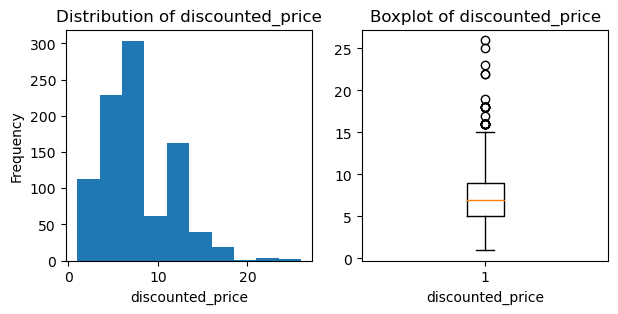

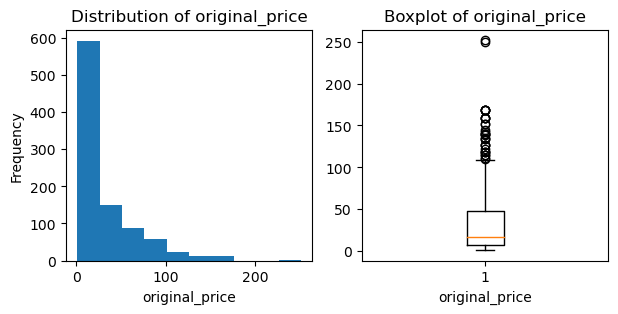

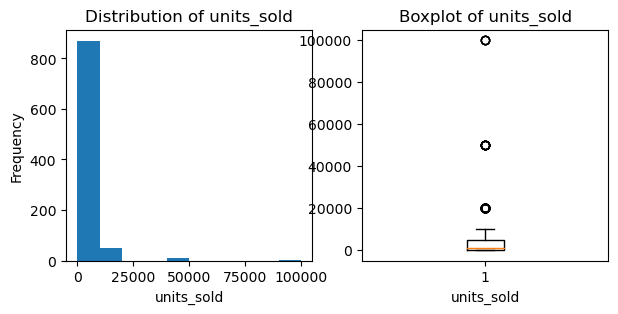

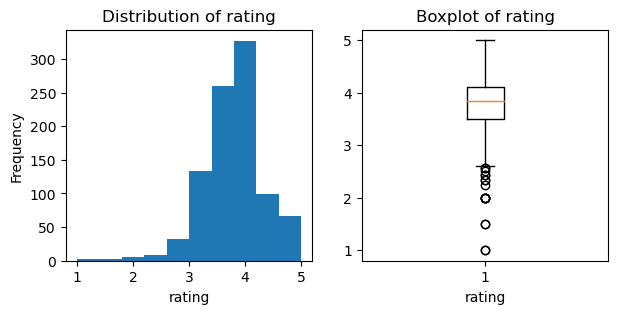

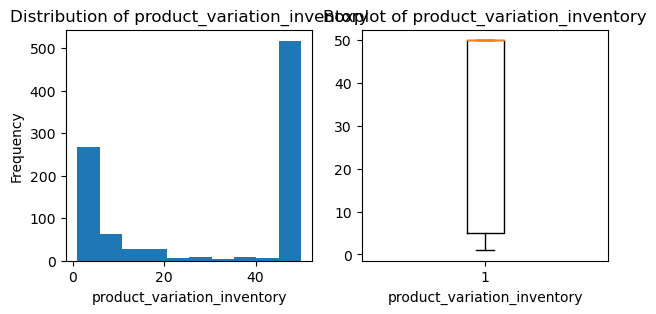

In [99]:
# define the function to visualize the distribution of the data
def plot_hist_box(df, col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
    ax1.hist(df[col], bins=10)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of {}'.format(col))
    ax2.boxplot(df[col])
    ax2.set_xlabel(col)
    ax2.set_title('Boxplot of {}'.format(col))
    plt.show()

# apply the function on the columns using a for loop
for col in columns_to_cal:
    plot_hist_box(df_clean, col)


### 6.1.1. **Insights**

from the central tendency calculation, we can see that:
- The mean of discounted_price, which is 7.44, shows a relatively moderate pricing range. The median discounted_price of 7 is only 1 less than the mode, which shows the concentration of products discounted_price around this central value. This shows that most of the company's products are priced at a relatively low price after discounts.

- As for original_prices, the mean original_prices of 31.28 indicates a wider distribution, potentially influenced by higher original_prices compared to the price after discounts. However, the median retail_price of 17 and the mode of 6 shows the presence of items with lower original_prices, making a skewed distribution that is heavily concentrated on the lower end. This shows that the company's products are generally priced at a relatively higher price before discounts, which shows a potential for higher profit margins.

- As for the units_sold data, the mean of 3932.39 and a median of 1000 shows a big variation in sales volume. The mode at 100 also shows a significant concentration of products with a relatively lower sales volume, making the distribution to be positively skewed. This shows that the company's products are generally sold at a relatively lower volume, with a few products sold at a very high volume.

- In terms of product ratings, the mean rating of 3.81 indicates a generally positive sentiment, while the median rating of 3.83 and mode rating of 5.0 shows a concentration of highly-rated products. This distribution suggests that a majority of company's products receive favorable ratings. This is a good sign for the company, as it shows that the company's products are generally well-received by customers.

- Lastly, the product_variation_inventory has a mean of 30.98, showing a moderate level of inventory variation. The median and mode values both at 50 suggest a concentration of products with more inventory, making the distribution skewed towards higher inventory levels. This shows that the company's products are generally well-stocked, with a few products having a very high inventory level, the company needs to be careful with the inventory management to avoid overstocking for the next summer season.

## 6.2. Potential Revenue

Before calculating the potential revenue, we have to calculate the revenue gained last summer to compare them.

To calculate the revenue gained last summer, we will sum the revenue gained from each product.

$$Revenue = Price * Units Sold$$

In [100]:
# calculate the total revenue, potential revenue, and revenue difference
df_clean['total_revenue'] = df_clean['discounted_price'] * df_clean['units_sold']
df_clean['potential_revenue'] = df_clean['original_price'] * df_clean['units_sold']
df_clean['revenue_difference'] = df_clean['potential_revenue'] - df_clean['total_revenue']

In [101]:
# print the total revenue, potential revenue, and revenue difference
print('Total revenue: €{}'.format(df_clean['total_revenue'].sum()))
print('Total potential revenue: €{}'.format(df_clean['potential_revenue'].sum()))
print('Total revenue difference: €{}'.format(df_clean['revenue_difference'].sum()))

Total revenue: €26785373.95
Total potential revenue: €122615518
Total revenue difference: €95830144.05


The total revenue gained last summer is €26 million, but the max total potential revenue is €122 million. This shows that the company has a lot of potential to increase their revenue from summer apparel.

We can calculate the potential revenue by multiplying the number of products sold by confidence interval of the **potential_revenue** column.

In [102]:
# calculate the standard deviation and N
std = df_clean['total_revenue'].std()
N = len(df_clean['total_revenue'])

# calculate the 95% confidence interval
low, high = st.t.interval(0.95, df_clean.shape[0]-1, loc=df_clean['total_revenue'].mean(), scale=std/np.sqrt(N))
print('95% confidence interval: €{} - €{}'.format(low*N, high*N))

95% confidence interval: €22877239.016870756 - €30693508.883129247


the potential revenue interval is €22877239.02 to €30693508.88.

#### **Insights**

The total revenue gained last summer is €26 million, but the max total potential revenue is €122 million. This shows that the company has a lot of potential to increase their revenue from summer apparel. After calculating the potential revenue, we can see that the potential revenue interval is €22877239.02 to €30693508.88. Which means that the company has the potential to increase their revenue to reach their goal of €31 million.

## 6.3. Top 10 Products Revenue

### 6.3.1. Top 10 Products Revenue

To gain more insights about the top 10 products that gives the most revenue during last summer, we will sort the products by their revenue.

In [103]:
# define top 10 products based on the total revenue
top_10_revenue_products = df_clean[['title_orig', 'total_revenue', 'potential_revenue', 'revenue_difference']].sort_values('total_revenue', ascending=False).head(10)

# Display the table
top_10_revenue_products

,title_orig,total_revenue,potential_revenue,revenue_difference
240,Women Lace Beach Boho Maxi Sundress Sleeveless...,750000.0,5750000,5000000.0
54,Women Stretchy Camisole Spaghetti Strap Long T...,577000.0,4800000,4223000.0
690,Women's Summer Sleeveless Turtleneck Mini Dress,567000.0,1900000,1333000.0
150,Womens Summer Red White and Blue Chiffon Short...,500000.0,3300000,2800000.0
12,2018 New Fashion Women's Tops Strappy Sleevel...,500000.0,2500000,2000000.0
25,Women Casual Striped T-shirt Long Tops Blouse...,450000.0,4050000,3600000.0
526,Comfy Sleeveless Hooded Mini Dress,400000.0,2700000,2300000.0
301,Fashion Women Back Deep V Backless Vest Tank ...,350000.0,650000,300000.0
567,Womens Short Sleeve Party Evening Crew Neck B...,300000.0,300000,0.0
225,Cheeky Bottom Women Beachwear Brazilian Biki...,285000.0,2900000,2615000.0


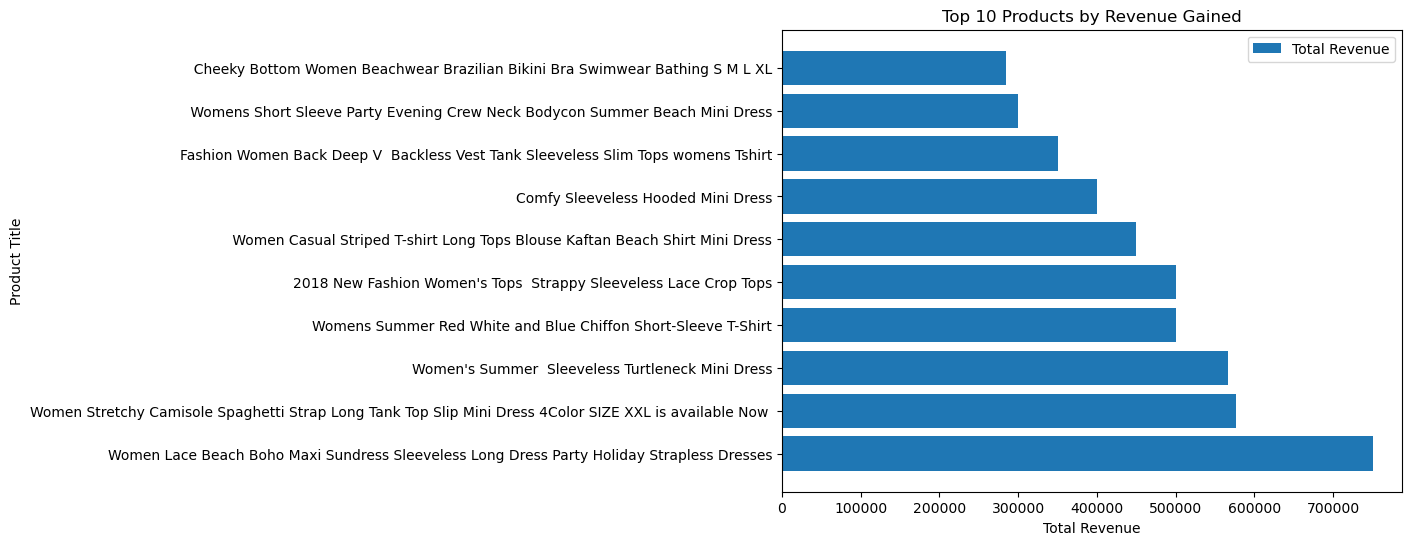

In [104]:
# visualize the top 10 products based on the total revenue
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10_revenue_products['title_orig'], top_10_revenue_products['total_revenue'], label='Total Revenue')

ax.set_title('Top 10 Products by Revenue Gained')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Product Title')

ax.legend()

plt.show()


Based on the top_10_revenue_products, we can see tell that most of the top 10 products are from the **Dresses** category, and most of them are **Mini** dresses. This shows that the company should focus on selling dresses, especially mini dresses, for the next summer season.

### 6.3.1. Top 10 Products Potential Revenue

In [105]:
# define top 10 products based on the potential revenue
top_10_potential_products = df_clean[['title_orig', 'total_revenue', 'potential_revenue', 'revenue_difference']].sort_values('potential_revenue', ascending=False).head(10)

# Display the table
top_10_potential_products

,title_orig,total_revenue,potential_revenue,revenue_difference
240,Women Lace Beach Boho Maxi Sundress Sleeveless...,750000.0,5750000,5000000.0
429,Women One-Piece Push Up Bikini Bandage Monoki...,220000.0,5000000,4780000.0
54,Women Stretchy Camisole Spaghetti Strap Long T...,577000.0,4800000,4223000.0
25,Women Casual Striped T-shirt Long Tops Blouse...,450000.0,4050000,3600000.0
150,Womens Summer Red White and Blue Chiffon Short...,500000.0,3300000,2800000.0
225,Cheeky Bottom Women Beachwear Brazilian Biki...,285000.0,2900000,2615000.0
526,Comfy Sleeveless Hooded Mini Dress,400000.0,2700000,2300000.0
12,2018 New Fashion Women's Tops Strappy Sleevel...,500000.0,2500000,2000000.0
203,Women Lace Floral White Long Maxi Dress Boho C...,240000.0,2360000,2120000.0
675,Plus Size Women Fashion Polka Shirt Casual Dot...,240000.0,2200000,1960000.0


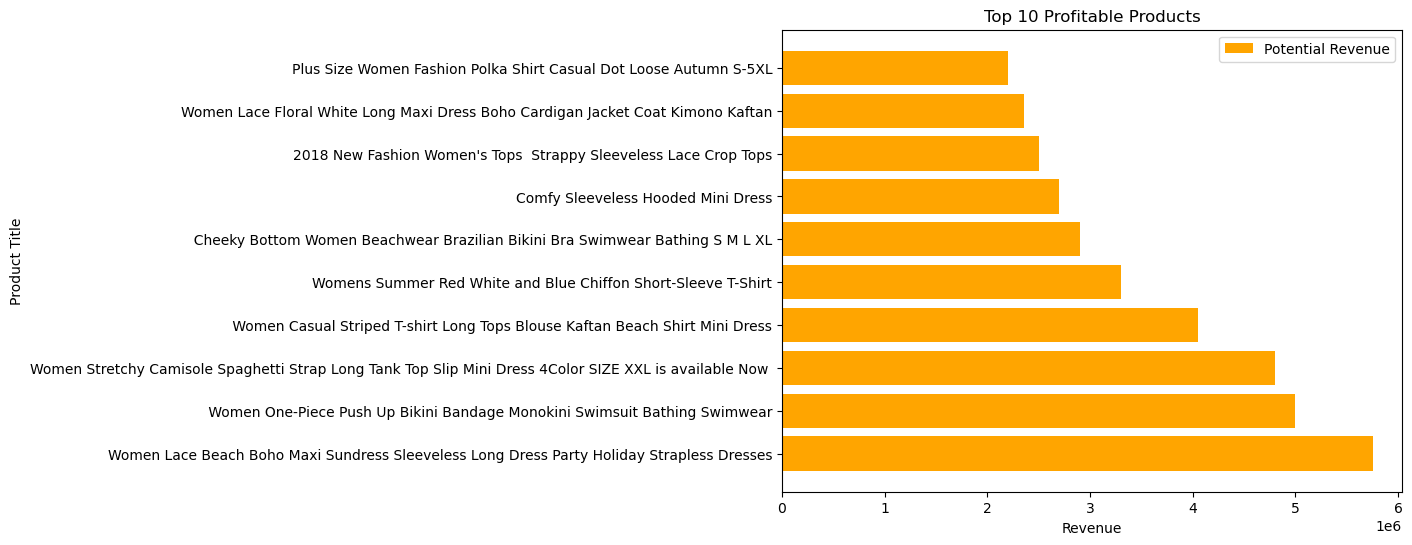

In [106]:
# visualize the top 10 products based on the potential revenue
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10_potential_products['title_orig'], top_10_potential_products['potential_revenue'], label='Potential Revenue', color='orange')

ax.set_title('Top 10 Profitable Products')
ax.set_xlabel('Revenue')
ax.set_ylabel('Product Title')

ax.legend()

plt.show()

Based on top_10_potential_products, we can see that the top 10 products has a very high potential revenue, with the highest potential revenue of €1.5 million. This shows that the company has a lot of potential to increase their revenue from summer apparel.

### 6.3.2. Top 10 Products Gained Revenue Compared to Potential Revenue

We can compare how much revenue the top 10 products gained last summer compared to their potential revenue.

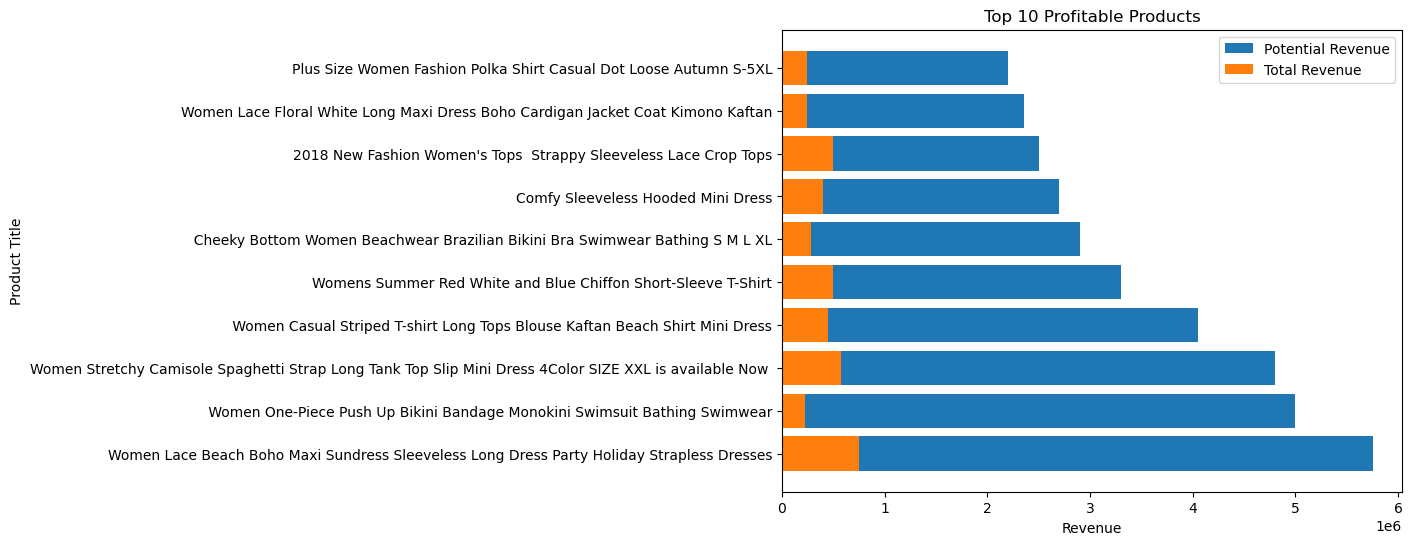

In [107]:
# visualize the top 10 products based on the total revenue and potential revenue
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10_potential_products['title_orig'], top_10_potential_products['potential_revenue'], label='Potential Revenue')
ax.barh(top_10_potential_products['title_orig'], top_10_potential_products['total_revenue'], label='Total Revenue')

ax.set_title('Top 10 Profitable Products')
ax.set_xlabel('Revenue')
ax.set_ylabel('Product Title')

ax.legend()

plt.show()


From the comparison, we can see that most of the top products gained less than 50% of their potential revenue.

### 6.3.1. **Insights**

In summary, we can see that the top 10 products that gained the most revenue last summer are mostly from the **Dresses** category, and most of them are **Mini** dresses. This shows that the company should focus on selling dresses, especially mini dresses, for the next summer season. Besides, we can see that the top 10 products has a very high potential revenue, with the highest potential revenue of €1.5 million. This shows that the company has a lot of potential to increase their revenue from summer apparel. However, most of the top products gained less than 50% of their potential revenue, which shows that the company needs to improve their sales strategy to increase their revenue. The company can start by focusing on reducing discounts for products with high demands, or by focusing on product with high customer interest.

## 6.4. Are products with High Discounts more likely to be sold?

Before deciding to reduce the discounts for products with high demands, the company needs to know whether products with high discounts are more likely to be sold or not

To answer the question, we can do a hypothesis testing. The null hypothesis is that there is no significant difference between the units sold of products with low discounts and high discounts. The alternative hypothesis is that there is a difference between the units sold of products with low discounts and high discounts.


$$H_0: Low Discounts Units Sold = High Discounts Units Sold$$
$$H_1: Low Discounts Units Sold \neq High Discounts Units Sold$$

To implement the hypothesis testing, we will use t-test because the data is normally distributed.

First, we need to create a column called price_diff, then we will split the data into 2 groups, which are low price diffrence and high price diffrence in a new column called price_diff_group. I'm using median as the threshold instead of mean because the data is skewed.

In [108]:
# calculate the median price difference
median_price_difference = df_clean['price_difference'].median()

# define the function to group the price difference
def price_difference_group(price_difference):
    if price_difference <= median_price_difference:
        return 'low'
    else:
        return 'high'

# apply the function on the price difference column
df_clean['price_difference_group'] = df_clean['price_difference'].apply(price_difference_group)

In [109]:
df_clean[['price_difference', 'price_difference_group']].head()

,price_difference,price_difference_group
0,14.00,high
1,35.00,high
2,0.00,low
3,0.28,low
4,5.08,low


In [110]:
# find the number of products in each group
df_clean['price_difference_group'].value_counts()

low     482
high    453
Name: price_difference_group, dtype: int64

There are 453 products with high price diffrence and 482 products with low price diffrence

Before doing the t-test, we have to check the units sold mean of both groups.

In [111]:
# print the mean units sold for each group
print('Mean Units sold for low discounts: {}'.format(df_clean[df_clean['price_difference_group'] == 'low']['units_sold'].mean()))
print('Mean Units sold for high discounts: {}'.format(df_clean[df_clean['price_difference_group'] == 'high']['units_sold'].mean()))

Mean Units sold for low discounts: 3729.091286307054
Mean Units sold for high discounts: 4148.695364238411


If we only see the mean, we can see that the units sold of products with low discounts is higher than the units sold of products with high discounts. However, we have to do the t-test to see if the difference is significant or not.

In [112]:
# calculate the t-statistic and p-value
t_stat, p_val = st.ttest_ind(df_clean[df_clean['price_difference_group'] == 'low']['units_sold'], df_clean[df_clean['price_difference_group'] == 'high']['units_sold'])

print('T-statistic: {}'.format(t_stat))
print('P-value: {}'.format(p_val))

T-statistic: -0.679819228331833
P-value: 0.49678756321572937


T-stat -0.68 means that the average units sold of products with high discounts is actually higher than the average units sold of products with low discounts by -0.68 times the standard deviation of the average units sold of products with low discounts. However, it needs to be checked whether the difference is significant or not by looking at the p-value.

In [113]:
# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Menguji hipotesis
if p_val < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.")

Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.


### 6.4.1. **Insights**

In summary, we can see that the average units sold of products with high discounts is actually higher than the average units sold of products with low discounts by -0.68 times the standard deviation of the average units sold of products with low discounts. However, the p-value of 0.5 shows that the difference is not significant, which means that the null hypothesis is accepted. This means that there is no significant difference between the units sold of products with low discounts and high discounts. Therefore, the company should not reduce the discounts for products with high demands, instead, they should shift their focus to products with high customer interest to increase their revenue.

## 6.5. What is the correlation between **total revenue** with **rating** 

To check whether customers prefer a certain rating, we can check the correlation between **total revenue** with **size** and **rating**.

In [114]:
# because rating is ordinal, we can use spearman correlation
corr, p_val = st.spearmanr(df_clean['total_revenue'], df_clean['rating'])
print('Correlation coefficient: {}'.format(corr))
print('P-value: {}'.format(p_val))

Correlation coefficient: 0.08443231051436759
P-value: 0.009797048572932138


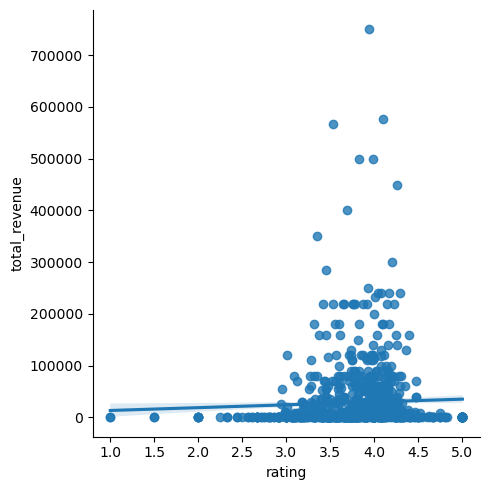

In [115]:
# visualize the correlation
sns.lmplot(data=df_clean, x='rating', y='total_revenue')

if only looking at it's correlation, we can see that there is a very weak correlation between total revenue with rating. However, we have to do a hypothesis testing to see if the correlation is significant or not.

In [116]:
# check significance
if p_val < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant correlation.")

Reject the null hypothesis. There is enough evidence to suggest a significant correlation.


### **Insight**

Based on the correlation test, with p-value of 0.01, we can see that the correlation is significant. However, the correlation coefficient of 0.03 shows that the correlation is very weak. This means that although weak, there is a positive correlation between total revenue with rating. Therefore, the company should can try to increase their revenue by increasing or maintaining customer satisfaction, while also focusing on other factors that can increase their revenue.

## 6.6. Best Selling Sizes and Colors

Another way to increase the company's revenue is by focusing on the best selling sizes and colors.

### 6.6.1 Best Selling Sizes

We can visualize the Sizes based on units sold to gain insight about last summer's best selling Sizes.

In [119]:
# re-map the size
size_mapping = {0: 'XXXS', 1: 'XXS', 2: 'XS', 3: 'S', 4: 'M', 5: 'L', 6: 'XL', 7: 'XXL', 8: 'XXXL', 9: 'XXXXL', 10: 'XXXXXL', 11: 'XXXXXXL'}
df_clean.index = df_clean.index.map(size_mapping)

# define a table to store the total units sold for each size
size_table = pd.pivot_table(df_clean, values='units_sold', index='product_variation_size_id', aggfunc=np.sum)
size_table = size_table.reindex(['XXXS', 'XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXXXL', 'XXXXXL', 'XXXXXXL'])
size_table

,units_sold
product_variation_size_id,
XXXS,1500
XXS,92088
XS,543879
S,2132574
M,614217
L,168803
XL,101600
XXL,6410
XXXL,15200


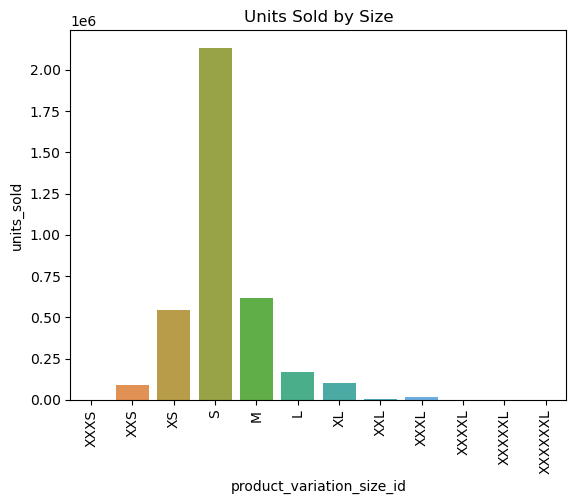

In [120]:
# barplot of units sold by size
sns.barplot(x=size_table.index, y='units_sold', data=size_table)
plt.xticks(rotation=90)
plt.title('Units Sold by Size')
plt.show()

It can be seen that the best selling sizes are **S**, **XS**, and **M**. This shows that the company should focus on selling products with those sizes for the next summer season. On the other hand, the worst selling sizes are **XXS**, **XXXS**, and **XXXXL**. This shows that the company should reduce the production of products with those sizes for the next summer season.

### 6.6.2. Best selling Colors

We can visualize the colors based on units sold to gain insight about last summer's best selling colors.

In [121]:
# define a table to store the total units sold for each color
color_table = pd.pivot_table(df_clean, values='units_sold', index='product_color', aggfunc=np.sum)
color_table = color_table.sort_values('units_sold', ascending=False)

In [122]:
# units sold by color
color_table.head(10)

,units_sold
product_color,
black,877253
white,680757
grey,390900
blue,242688
purple,188950
pink,152390
green,147763
red,146100
orange,141708


Visualize top 10 colors using pie chart

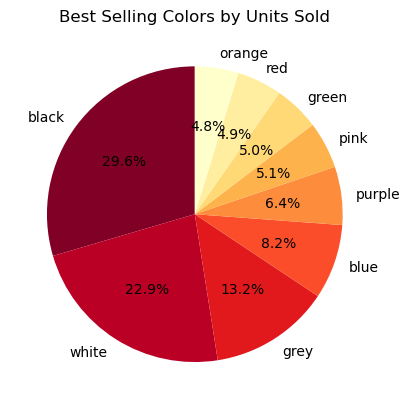

In [123]:
# visualize the top colors by units sold in a pie chart
color_pivot_filtered = color_table[color_table['units_sold'] >= 100000]
top_10_colors = color_pivot_filtered.sort_values(by='units_sold', ascending=False).head(10)

plt.pie(top_10_colors['units_sold'], labels=top_10_colors.index, autopct='%1.1f%%', colors=plt.cm.YlOrRd(np.linspace(1, 0, len(top_10_colors))), startangle=90)
plt.title('Best Selling Colors by Units Sold')
plt.show()

It can be seet that the best selling colors are **black**, **white**, and **grey**. This shows that the company should focus on selling products with those colors for the next summer season.

### 6.6.3. **Insights**

The units sold based on sizes shows that products with sizes 'S' and 'XS' shows a very high sales, while larger sizes such as 'XXXL' and above have relatively lower sales. This information can guide inventory management and production decisions to match with customer preferences and therefore can optimize sales. Other than that, the analysis of top-selling colors shows that products that are colored black, white, and grey are the most popular, making a big portion of total units sold. This shows the significance of color in consumer choices and suggests an opportunity for the company to focus or expand product lines in these colors.

## 6.7. Ad Boosts Impact on Revenue

another way to increase the company's revenue is by using ad boosts. Before deciding whether to use ad boosts or not, we have to know the impact of ad boosts on the company's revenue.

In [124]:
# define a table to store the total units sold using ad boosts or not
ad_boost_table = pd.pivot_table(df_clean, values='total_revenue', index='uses_ad_boosts', aggfunc=np.sum)

ad_boost_table

,total_revenue
uses_ad_boosts,
0,15929367.95
1,10856006.00


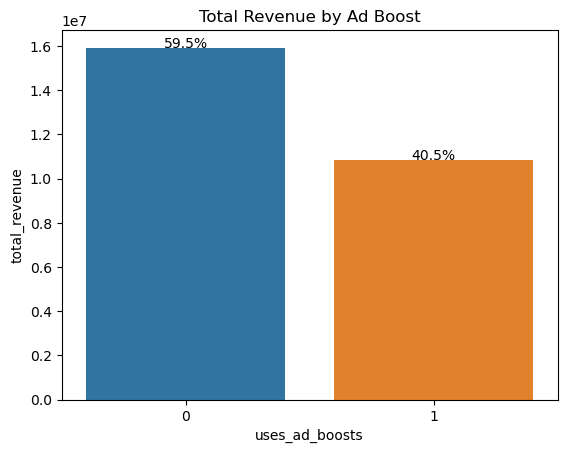

In [125]:
# visualize the total revenue by ad boost
sns.barplot(x=ad_boost_table.index, y='total_revenue', data=ad_boost_table)
plt.title('Total Revenue by Ad Boost')

for i, v in enumerate(ad_boost_table['total_revenue']):
    plt.text(i, v, '{:.1f}%'.format(v/ad_boost_table['total_revenue'].sum()*100), ha='center')

plt.show()

It can be seen that the sum of revenue gained from products with ad boosts is 59.5% of total revenue, while the sum of revenue gained from products without ad boosts is 40.5% of total revenue.

### 6.7.1. **Insights**

The company should use ad boosts to increase their revenue because the sum of revenue gained from products with ad boosts is 59.5% of total revenue, while the sum of revenue gained from products without ad boosts is 40.5% of total revenue.

In [128]:
#export the cleaned dataset to csv
df_clean.to_csv('summer-products_analyzed.csv', index=False)

# 7. Kesimpulan Akhir

After comprehensive analysis that was done on XYZ's summer apparel sales data, there are several goals that can be done by the company to achieve its goal of increasing revenue from summer products by 20% (€31 million) by the end of the next summer season. Here are the recommendations based on the findings:

Product Strategy. The top-performing products from last summer were predominantly from the Dresses category, with a significant portion being Mini dresses. To gain more revenue from this trend, the company should strategically focus and expand its inventory of dresses, particularly in the Mini dress category. Other than that, While the top 10 products contributed significantly to revenue, there is a lot of untapped potential. The company should closely pay attention to these products and implement strategies to fill the gap between the revenue gained and their full potential. This process could involve adjusting pricing strategies, enhancing product visibility, or re-planning marketing approaches.

Pricing and Discounts. The analysis done on affects of discounts revealed that products with high discounts did not necessarily result in higher sales. Rather than reducing discounts across the board, XYZ should focus on strategic discounting. Products with high demand may not require heavy discounts, allowing the company to maintain profit margins while satisfying customer demand.

Customer Satisfaction. The analysis also reveals the weak but significant correlation between total revenue and product ratings. This fact suggests that maintaining or improving customer satisfaction can positively impact revenue. XYZ should continue to prioritize product quality, customer service, and overall satisfaction to maintain long-term customer loyalty.

Inventory Management. The analysis shows that the best-selling sizes were identified as S, XS, and M, while the most popular colors were black, white, and grey. To optimize inventory management, XYZ should focus on producing more units with these preferred sizes and colors, while also reducing production for less popular sizes and colors.

Marketing Strategy. The analysis also indicates that products with ad boosts contributed significantly to total revenue. XYZ should continue to invest in ad boosts, strategically promoting products to maximize visibility and appeal to potential customers. A good advertising strategy can enhance product discoverability and improve sales, hence improving revenue.

In conclusion, In order to improve their revenue by 20% for XYZ summer products, they have to plan a product strategy, deciding on better and strategic pricing and discounts, maintaining dan improving customer satisfaction, managing inventory management based on popular items, and continue their marketing strategy by using adboosts.